# Assignment 2 - Entertainment Data (CleverClogs)


Author: Zoe Pointon

Context: User Experience

Background information: https://www.blackwoodgroup.org.uk/clevercogs/

The data analysed in this notebook is the usage data for a tablet application called 'CleverClogs'. CleverClogs is an application, developed for a tablet, designed to empower elderly and disabled people with technology, and incorporate it into their daily lives. The user competency of the app is varied, however all are given 12 hours of training. The app is multi functional. There are sections within the app for; music, video, games, video calling, panic alarm, calendar and more. The app also has a web browser (some extremely vulnerable users have this switched off).


The dataset is made up of click data. Each row in the dataset has these seven columns; day/time stamp, user ID, user role, building, link title, link type and content info. There are around 500 users and 132537 lines of data.

We were later also given a dataset of the users information. This data included details suchas; external ID, clever clogs user ID, birthdate, gender and condition. There are in total 696 users. The two datasets are linked via an ID specifically the ExternalID.

The data owner is the man who developed the tablet, Collin, and a university researcher, Lynda. They would like the data to be analysed so they can include some visulisations for a proposal they are writing. They are interested in any insight that we can gain from the dataset.

My main focus is to find out how the users are using the app. Specifically, finding trends in what the users are using the app for. Also finding out how they are accessing these things. When are they using the built in functions? And when do they use the web browser?

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("data.csv")
print(df)

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (1,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


                    Time ExternalID  Role                    Building  \
0       29/10/2018 10:55       5325  User                Broom Ground   
1       29/10/2018 10:50       5325  User                Broom Ground   
2       29/10/2018 10:49       5325  User                Broom Ground   
3       29/10/2018 10:49       5325  User                Broom Ground   
4       29/10/2018 10:48        NaN  User  Belses Gardens - Care Home   
5       29/10/2018 10:41       5541  User    STH Ayshire St Leonards    
6       29/10/2018 10:39       5541  User    STH Ayshire St Leonards    
7       29/10/2018 10:38       5541  User    STH Ayshire St Leonards    
8       29/10/2018 10:38        NaN  User  Belses Gardens - Care Home   
9       29/10/2018 10:37       5107  User                         NaN   
10      29/10/2018 10:37       5107  User                         NaN   
11      29/10/2018 10:37       5107  User                         NaN   
12      29/10/2018 10:35        NaN  User  Belses G

# Data cleaning

I first ran a .shape to make sure it returned the right number of columns and rows.

In [2]:
df.shape

(132536, 219)

This showed me that the data was returning more columns than it should. There are only 7 columns in this data. To make sure i printed all the column headers.

In [3]:
print('Column headers', df.columns)

Column headers Index(['Time', 'ExternalID', 'Role', 'Building', 'LinkTitle', 'LinkType',
       'ContentInfo', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9',
       ...
       'Unnamed: 209', 'Unnamed: 210', 'Unnamed: 211', 'Unnamed: 212',
       'Unnamed: 213', 'Unnamed: 214', 'Unnamed: 215', 'Unnamed: 216',
       'Unnamed: 217', 'Unnamed: 218'],
      dtype='object', length=219)


This told me that there were some extra unamed rows I needed to remove. So I droped all columns except the first 7.

In [4]:
df.drop(df.columns[7:], axis=1, inplace=True)
print('Column headers', df.columns)

Column headers Index(['Time', 'ExternalID', 'Role', 'Building', 'LinkTitle', 'LinkType',
       'ContentInfo'],
      dtype='object')


In [5]:
df.shape

(132536, 7)

I then ran value counts on some of the rows with more quantative data to make sure all rows were returning valid data.

In [6]:
df['Role'].value_counts()

User                                    132062
Support                                    402
 font-family: " comic="" sans="" ms"        18
Name: Role, dtype: int64

In [7]:
df['Building'].value_counts()

STH Ayshire St Leonards        20765
Charleston                     17193
Belses Gardens - Care Home     15935
Edinburgh West C@H             13091
Aberdeen Raeden Court CH       13049
Broom Ground                   12175
Broom Middle                    7962
Broom Supported Flats           7715
Edinburgh Responder Service     6544
Edinburgh East C@H              6222
Broom Court                     3975
Edinburgh                       2233
LFC Main Building               1897
Glasgow C@H                      850
Broom Respite                    805
Complex Home 1                   695
Broom Houses                     386
LFC Care at Home                 196
Tayside Services                 116
Aberdeen C@H                      91
Arbroath                          75
Dundee                            46
="" font-size:="" x-large         18
Name: Building, dtype: int64

In [8]:
df['LinkType'].value_counts()

Category                                            62498
Internet                                            56684
HTML page                                            7455
Radio                                                5077
Services                                              493
Gallery                                               185
Standard page                                          71
><span style=font-family: " comic="" sans="" ms"       18
Phone                                                   1
Name: LinkType, dtype: int64

In [9]:
df['LinkTitle'].value_counts()

Entertainment                          19950
My Interests                           10203
Play Games                              6705
Single Player Games                     6514
YouTube                                 6371
Facebook                                6254
My Music                                6199
Patience                                6195
Google                                  4385
Videos                                  4100
BBC Football                            2686
Radio Stations                          2429
Information                             2265
Smooth Radio                            2076
Solitaire                               1981
Disney Films Video Music Playlist       1655
Celtic FC                               1619
Rangers Football Club                   1367
Yahoo Mail                              1300
Elvis Presley                           1269
Bowling                                 1259
Candy Crush Soda                        1127
Mahjong   

In [10]:
df['ContentInfo'].value_counts()

Flash                                                                                                                                                                         7454
-1|329|10| Comfort Break|1|                                                                                                                                                    236
-1|424|10| Contact Blackwood|1|                                                                                                                                                 91
-1|332|5| Dropped Book|1|                                                                                                                                                       74
<h2>Care Standards for support services </h2><div><span style="font-weight: normal                                                                                              44
-1|479|10| Ask for new content|1|                                                                        

I could see that there were clearly 18 rows that were returning invalid data. I removed these rows.

In [11]:
df.drop(df.loc[df['Role']==' font-family: " comic="" sans="" ms"'].index, inplace=True)
print(df)

                    Time ExternalID  Role                    Building  \
0       29/10/2018 10:55       5325  User                Broom Ground   
1       29/10/2018 10:50       5325  User                Broom Ground   
2       29/10/2018 10:49       5325  User                Broom Ground   
3       29/10/2018 10:49       5325  User                Broom Ground   
4       29/10/2018 10:48        NaN  User  Belses Gardens - Care Home   
5       29/10/2018 10:41       5541  User    STH Ayshire St Leonards    
6       29/10/2018 10:39       5541  User    STH Ayshire St Leonards    
7       29/10/2018 10:38       5541  User    STH Ayshire St Leonards    
8       29/10/2018 10:38        NaN  User  Belses Gardens - Care Home   
9       29/10/2018 10:37       5107  User                         NaN   
10      29/10/2018 10:37       5107  User                         NaN   
11      29/10/2018 10:37       5107  User                         NaN   
12      29/10/2018 10:35        NaN  User  Belses G

I then ran value count for the Role column again to make sure it only returned valid values.

In [12]:
df['Role'].value_counts()

User       132062
Support       402
Name: Role, dtype: int64

ContentInfo was returning some very messy values so I went through and cleaned them up using replace.

In [13]:
df['ContentInfo'] = df['ContentInfo'].replace({'-1|329|10| Comfort Break|1|': 'Comfort Break'})
df['ContentInfo'] = df['ContentInfo'].replace({'-1|424|10| Contact Blackwood|1|': 'Contact Blackwood'})
df['ContentInfo'] = df['ContentInfo'].replace({'-1|332|5| Dropped Book|1|': 'Dropped Book'})    
df['ContentInfo'] = df['ContentInfo'].replace({'<h2>Care Standards for support services </h2><div><span style="font-weight: normal': 'Care Standards for support services'})
df['ContentInfo'] = df['ContentInfo'].replace({'-1|479|10| Ask for new content|1|': 'Ask for new content'})
df['ContentInfo'] = df['ContentInfo'].replace({'-1|209|30| Alarm|1|': 'Alarm'})
df['ContentInfo'] = df['ContentInfo'].replace({'-1|356|15| Out of Bed (2)|1|1': 'Out of Bed'})
df['ContentInfo'] = df['ContentInfo'].replace({'-1|224|10| Coffee|1|': 'Coffee'})
df['ContentInfo'] = df['ContentInfo'].replace({'-1|348|15| HELP INTO BED|1|1': 'HELP INTO BED'})
df['ContentInfo'] = df['ContentInfo'].replace({'-1|454|2|Slow to Drain|1|': 'Slow to Drain'})
df['ContentInfo'] = df['ContentInfo'].replace({'-1|331|10|  Breakfast  |1|': 'Breakfast'})
df['ContentInfo'] = df['ContentInfo'].replace({'-1|327|5| Cup of Tea |1|': 'Cup of Tea'})
df['ContentInfo'] = df['ContentInfo'].replace({'-1|295|10| Wheel Chair Support|1|': 'Wheel Chair Support'})
df['ContentInfo'] = df['ContentInfo'].replace({'-1|542|30|Blocked|1|': 'Blocked'})
df['ContentInfo'] = df['ContentInfo'].replace({'-1|331|10|  Breakfast  |1|': 'Breakfast'})
df['ContentInfo'] = df['ContentInfo'].replace({'Make a Payment<div><br></div><div><br></div>': 'Make a Payment'})

        
df['ContentInfo'] = df['ContentInfo'].replace({'="" font-size:="" large': np.nan})
df['ContentInfo'] = df['ContentInfo'].replace({'66|331||||': np.nan})
df['ContentInfo'] = df['ContentInfo'].replace({'<iframe src="spiral.asp" height="600" width="700" scrolling="no" frameBorder="0"></iframe>': np.nan})
df['ContentInfo'] = df['ContentInfo'].replace({'If the water is not draining properly try these steps first<div><br></div><div>1</div><div><br></div><div><br></div><div>2</div><div><br></div><div><br></div><div>3</div>': np.nan})
df['ContentInfo'] = df['ContentInfo'].replace({'<p class="MsoNormal" style="margin: 0px': np.nan})
df['ContentInfo'] = df['ContentInfo'].replace({'<span style="font-family: &quot': np.nan})
df['ContentInfo'] = df['ContentInfo'].replace({'<div style="text-align: center': np.nan})



In [14]:
df['ContentInfo'].value_counts()

Flash                                  7454
Comfort Break                           236
Contact Blackwood                        91
Dropped Book                             74
Care Standards for support services      44
Ask for new content                      39
Alarm                                    20
Out of Bed                                7
Slow to Drain                             5
HELP INTO BED                             5
Coffee                                    5
Your rent account with Blackwood          4
Blocked                                   2
Make a Payment                            2
Cup of Tea                                2
Breakfast                                 1
Wheel Chair Support                       1
Name: ContentInfo, dtype: int64

I then decided to remove all rows that are about support accounts. I did this as I am not interested in how support people are using the system.

In [15]:
df.drop(df.loc[df['Role']=='Support'].index, inplace=True)
print(df)

                    Time ExternalID  Role                    Building  \
0       29/10/2018 10:55       5325  User                Broom Ground   
1       29/10/2018 10:50       5325  User                Broom Ground   
2       29/10/2018 10:49       5325  User                Broom Ground   
3       29/10/2018 10:49       5325  User                Broom Ground   
4       29/10/2018 10:48        NaN  User  Belses Gardens - Care Home   
5       29/10/2018 10:41       5541  User    STH Ayshire St Leonards    
6       29/10/2018 10:39       5541  User    STH Ayshire St Leonards    
7       29/10/2018 10:38       5541  User    STH Ayshire St Leonards    
8       29/10/2018 10:38        NaN  User  Belses Gardens - Care Home   
9       29/10/2018 10:37       5107  User                         NaN   
10      29/10/2018 10:37       5107  User                         NaN   
11      29/10/2018 10:37       5107  User                         NaN   
12      29/10/2018 10:35        NaN  User  Belses G

I then a value count to make sure it only returned User roles.

In [16]:
df['Role'].value_counts()

User    132062
Name: Role, dtype: int64

In [17]:
df['LinkType'].value_counts()

Category         62300
Internet         56513
HTML page         7451
Radio             5077
Services           475
Gallery            181
Standard page       64
Phone                1
Name: LinkType, dtype: int64

Now I am going to clean the user-data.csv dataset.

In [18]:
ud = pd.read_csv("user-data.csv")
print(ud)

     ExternalID  CleverCogsUserId   BirthDate Gender              Condition
0          4703               685  04/07/1965      F           Spina Bifida
1          4704               772  21/06/1940      F                   COPD
2          4706              1128  25/02/1931      F               Dementia
3          4707              1159  18/09/1982      F           Brain Injury
4          4708               784  20/12/1931      F                    NaN
5          4709               938  28/11/1925      F   Elderly Care/Support
6          4710               807  21/01/1937      F               Dementia
7          4711               765  25/06/1955      F         Cerebral Palsy
8          4712               811  10/05/1929      F               Dementia
9          4713               683  28/05/1960      F               Epilepsy
10         4714               860  28/05/1949      F                    NaN
11         4714               860  28/05/1949      F   Elderly Care/Support
12         4

In [19]:
ud['Gender'].value_counts()

F    413
M    274
U      8
Name: Gender, dtype: int64

In [20]:
ud['Condition'].value_counts()

Elderly Care/Support              160
Dementia                           79
Stroke                             28
Cerebral Palsy                     27
Multiple Sclerosis                 22
COPD                               21
Learning Difficulties              16
Arthritis                          16
Brain Injury                       16
Spina Bifida                       13
Parkinsons                         13
Epilepsy                            9
Diabetes                            7
Cancer                              7
Visual Impairment                   7
Lifelong Mobility Issues            7
Huntington's                        5
Asthma                              4
Amputee                             3
Spinal Injury                       3
Physical Injury                     3
Bi Polar Disorder                   3
Down Syndrome                       2
Muscular Dystrophy                  2
Progressive Supranuclear Palsy      1
Cerebellar Ataxia                   1
Name: Condit

While trying to work out age of users I found that there was a user without a BirthDate inputed. I dropped this row becuase it was disturbing my dataset.

In [21]:
ud.drop(ud.loc[ud['BirthDate'] == ''].index, inplace = True)

The data seems to look ok from the value counts I ran. So I am now going to work out each users age and create a new column form this.

In [22]:
import datetime as datetime

In [23]:
ud['BirthDate'] =  pd.to_datetime(ud['BirthDate'], format='%d/%m/%Y')
print(ud)

     ExternalID  CleverCogsUserId  BirthDate Gender              Condition
0          4703               685 1965-07-04      F           Spina Bifida
1          4704               772 1940-06-21      F                   COPD
2          4706              1128 1931-02-25      F               Dementia
3          4707              1159 1982-09-18      F           Brain Injury
4          4708               784 1931-12-20      F                    NaN
5          4709               938 1925-11-28      F   Elderly Care/Support
6          4710               807 1937-01-21      F               Dementia
7          4711               765 1955-06-25      F         Cerebral Palsy
8          4712               811 1929-05-10      F               Dementia
9          4713               683 1960-05-28      F               Epilepsy
10         4714               860 1949-05-28      F                    NaN
11         4714               860 1949-05-28      F   Elderly Care/Support
12         4715          

In [24]:
for i in ud.index:
    today = datetime.datetime.now()
    dob = ud.at[i, 'BirthDate']
    ud.at[i, 'Age'] = today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day))
print(ud)

     ExternalID  CleverCogsUserId  BirthDate Gender              Condition  \
0          4703               685 1965-07-04      F           Spina Bifida   
1          4704               772 1940-06-21      F                   COPD   
2          4706              1128 1931-02-25      F               Dementia   
3          4707              1159 1982-09-18      F           Brain Injury   
4          4708               784 1931-12-20      F                    NaN   
5          4709               938 1925-11-28      F   Elderly Care/Support   
6          4710               807 1937-01-21      F               Dementia   
7          4711               765 1955-06-25      F         Cerebral Palsy   
8          4712               811 1929-05-10      F               Dementia   
9          4713               683 1960-05-28      F               Epilepsy   
10         4714               860 1949-05-28      F                    NaN   
11         4714               860 1949-05-28      F   Elderly Ca

# Exploring Data

First I explored the first dataset called df. As my angle of analitics was the LinkType column I satrted there.

In [25]:
print(df)

                    Time ExternalID  Role                    Building  \
0       29/10/2018 10:55       5325  User                Broom Ground   
1       29/10/2018 10:50       5325  User                Broom Ground   
2       29/10/2018 10:49       5325  User                Broom Ground   
3       29/10/2018 10:49       5325  User                Broom Ground   
4       29/10/2018 10:48        NaN  User  Belses Gardens - Care Home   
5       29/10/2018 10:41       5541  User    STH Ayshire St Leonards    
6       29/10/2018 10:39       5541  User    STH Ayshire St Leonards    
7       29/10/2018 10:38       5541  User    STH Ayshire St Leonards    
8       29/10/2018 10:38        NaN  User  Belses Gardens - Care Home   
9       29/10/2018 10:37       5107  User                         NaN   
10      29/10/2018 10:37       5107  User                         NaN   
11      29/10/2018 10:37       5107  User                         NaN   
12      29/10/2018 10:35        NaN  User  Belses G

I refreshed my memory on the diffrent vaules of LinkType.

In [26]:
df['LinkType'].value_counts()

Category         62300
Internet         56513
HTML page         7451
Radio             5077
Services           475
Gallery            181
Standard page       64
Phone                1
Name: LinkType, dtype: int64

I created a bar chart to see what types of things the users are clicking on. 

The results showed me that users are using the internet about the same amount as they are using the built in tablet fuctions (Category). This could indicate that there is some built functions missing or that do not perform as the user would wish so they are using the internet instead. It could also indicated that users just like browsing the internet.

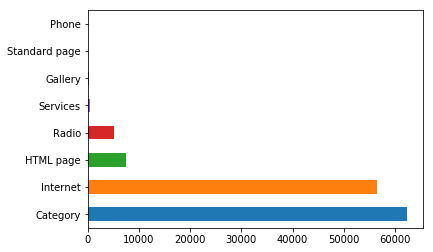

In [27]:
df['LinkType'].value_counts().plot(kind='barh')

Part of what I want to find out is how the clients are using the the custom built sections and for what. Because of this I created a barchat to see what Category sections are the most popular. I looked at the LinkTitles again. These are link titles of all aspects of the tabet. So I needed to narrow down the return to just the 'Category' LinkTitles.

In [28]:
df['LinkTitle'].value_counts()

Entertainment                          19916
My Interests                           10186
Play Games                              6692
Single Player Games                     6498
YouTube                                 6371
Facebook                                6254
Patience                                6193
My Music                                6191
Google                                  4383
Videos                                  4091
BBC Football                            2686
Radio Stations                          2427
Information                             2260
Smooth Radio                            2076
Solitaire                               1977
Disney Films Video Music Playlist       1655
Celtic FC                               1619
Rangers Football Club                   1367
Yahoo Mail                              1300
Elvis Presley                           1269
Bowling                                 1258
Candy Crush Soda                        1127
Mahjong   

I cut the dataset to return only rows where LinkType equals 'Categorys'. I then added all the LinkTitles to a list. 

In [29]:
CategoryData = []
for i in df.index:
    if df.at[i, 'LinkType'] == 'Category':
        CategoryData.append(df.at[i, 'LinkTitle'])

print(CategoryData)

['My Music', 'Entertainment', 'My Music', 'Entertainment', 'My Music', 'Entertainment', 'My Interests', 'Single Player Games', 'Play Games', 'Entertainment', 'Videos', 'Entertainment', 'Information', 'Entertainment', 'Testing Internal', 'Cup Of Tech', 'Single Player Games', 'Play Games', 'Entertainment', 'Videos', 'Entertainment', 'My Music', 'Entertainment', 'Radio Stations', 'Entertainment', 'My Music', 'Single Player Games', 'Play Games', 'Entertainment', 'My Interests', 'Single Player Games', 'Play Games', 'Entertainment', 'My Music', 'Entertainment', 'My Interests', 'My Music', 'Entertainment', 'Radio Stations', 'Entertainment', 'Information', 'Entertainment', 'My Interests', 'My Music', 'Entertainment', 'My Music', 'Entertainment', 'Videos', 'Entertainment', 'Single Player Games', 'Play Games', 'Entertainment', 'Single Player Games', 'Play Games', 'Entertainment', 'My Interests', 'Videos', 'Entertainment', 'Videos', 'Entertainment', 'My Music', 'Entertainment', 'Health & Wellbein

I counted how many items there were in the list to get an idea of scale.

In [30]:
len(CategoryData)

62300

I then keyed and counted the values in the list.

In [31]:
import collections

CategoryDataCounter=collections.Counter(CategoryData)

print(CategoryDataCounter.keys())
print(CategoryDataCounter.values())

dict_keys(['My Music', 'Entertainment', 'My Interests', 'Single Player Games', 'Play Games', 'Videos', 'Information', 'Testing Internal', 'Cup Of Tech', 'Radio Stations', 'Health & Wellbeing ', 'Online TV', 'Remote Control Cars', 'Football', 'Terms and Conditions', 'Photo Albums', 'Ask For', 'Blackwood', 'Test Cards', 'Care Websites', 'Power', 'Repairs', 'Sink', 'Bathroom', 'Health', 'Rent', 'Transport', 'Ask for Meals ', 'Hot Drinks', 'Ebooks', 'Clevercogs Training', 'Multiplayer Games', 'Local Information - Dundee', 'Tablet Games', 'Local Information Glasgow', 'Home Manuals', 'Kitchen', 'Control My Room', 'Gardening', 'Toilet', 'Shopping', 'Local Information Edinburgh', 'Housing Support', 'SPORT', 'Local Information Ayr', 'Welcome Pack', 'IQPC Games', 'Travel Information', 'Weather', 'External or Garden Repairs'])
dict_values([6191, 19916, 10186, 6498, 6692, 4091, 2260, 11, 3, 2427, 152, 907, 28, 45, 46, 569, 552, 325, 672, 157, 14, 43, 5, 7, 7, 14, 196, 2, 3, 4, 22, 26, 22, 2, 14, 3

I then made a barchart from these lists. The bar chart showed me the 6 most clicked on built in functions. These are; My Music, Entertainment, My Interests, Single Player Games, Play Games and Videos.

Entertainment is the most clicked on by nearly double the rest. This leads me to believe that Entertainment might have subcategories within it suchas; My Music or Games. However I cannot be sure without asking the data holder.

Even though I cannot be sure what 'Entertainment' is exactly, there is a clear corrilation that for the most part people are using the tablet mainly for Music, Games and watching Videos. This is where I will analyse deeper.

<BarContainer object of 50 artists>

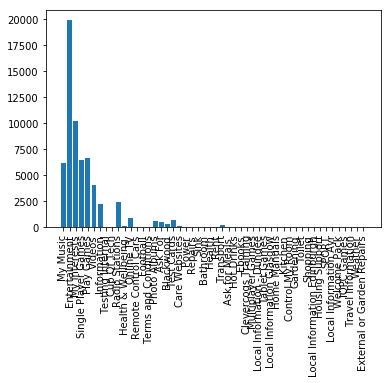

In [32]:
x = CategoryDataCounter.keys()
y = CategoryDataCounter.values()

locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.bar(x, y)

I decided to look into how the users are listening to music. I started by looking at what types of radio stations the users are listening to.
I did this by creating a list of all the LinkTitles that include the phrase 'Radio'.

In [33]:
RadioData = []
for i in df.index:
    if type(df.at[i, 'LinkTitle']) is str:
        if df.at[i, 'LinkTitle'].count('Radio') > 0:
            RadioData.append(df.at[i, 'LinkTitle'])

print(RadioData)

['Smooth Radio', 'Radio Stations', 'Smooth Radio', 'Radio Stations', 'Radio Stations', 'Smooth Radio', 'Radio Stations', 'Radio Stations', 'Radio Stations', 'Radio Stations', 'Radio Stations', 'Heart Radio', 'Radio Stations', 'Smooth Radio', 'Smooth Radio', 'Smooth Radio', 'Radio Stations', 'Smooth Radio', 'Radio Stations', 'Radio Stations', 'Radio Stations', 'Radio Stations', 'Smooth Radio', 'Radio Stations', 'Smooth Radio', 'Radio Stations', 'Smooth Radio', 'Smooth Radio', 'Radio Stations', 'Smooth Radio', 'Radio Stations', 'Radio Stations', 'Radio Stations', 'Radio Stations', 'Radio Stations', 'Radio Stations', 'Radio Stations', 'Smooth Radio', 'Radio Stations', 'Radio Stations', 'Radio Stations', 'Radio Stations', 'Radio Stations', 'Radio Stations', 'Radio Stations', 'Smooth Radio', 'Smooth Radio', 'Smooth Radio', 'Smooth Radio', 'Smooth Radio', 'Radio Stations', 'Radio Stations', 'Radio Stations', 'Smooth Radio', 'Radio Stations', 'Smooth Radio', 'Radio Stations', 'Radio Stations'

I counted how many items there were in the list to get an idea of scale.

In [34]:
len(RadioData)

4860

In [35]:
RadioDataCounter=collections.Counter(RadioData)

print(RadioDataCounter.keys())
print(RadioDataCounter.values())

dict_keys(['Smooth Radio', 'Radio Stations', 'Heart Radio', 'Kerrang Radio', 'TalkSport Radio', 'BBC Radio Scotland', 'Southside Radio Cars', 'Gold Radio', 'BBC Radio 4 Extra', 'TalkSport Radio- Direct', 'Agatha Christie Radio Plays', 'Heart Radio (tablet)', 'Heat Radio', 'Kerrang Radio- Direct', 'Radio Tay (Live)', 'Country Music Radio Stations', 'SHMU Radio', 'BBC Radio 1 '])
dict_values([2076, 2427, 26, 32, 16, 26, 5, 205, 3, 4, 3, 1, 26, 5, 2, 1, 1, 1])


'Radio Stations' is the click before the user gets to the radio station. I can tell becuase the amount of stations clicked on is about the same amount as the amount of clicks on 'Radio Sation'. From this I removed 'Radio Stations' from the visulisation.

In [36]:
while 'Radio Stations' in RadioData:
    RadioData.remove('Radio Stations')

print(RadioData)

['Smooth Radio', 'Smooth Radio', 'Smooth Radio', 'Heart Radio', 'Smooth Radio', 'Smooth Radio', 'Smooth Radio', 'Smooth Radio', 'Smooth Radio', 'Smooth Radio', 'Smooth Radio', 'Smooth Radio', 'Smooth Radio', 'Smooth Radio', 'Smooth Radio', 'Smooth Radio', 'Smooth Radio', 'Smooth Radio', 'Smooth Radio', 'Smooth Radio', 'Smooth Radio', 'Smooth Radio', 'Smooth Radio', 'Smooth Radio', 'Smooth Radio', 'Smooth Radio', 'Smooth Radio', 'Smooth Radio', 'Smooth Radio', 'Smooth Radio', 'Smooth Radio', 'Smooth Radio', 'Smooth Radio', 'Smooth Radio', 'Smooth Radio', 'Smooth Radio', 'Smooth Radio', 'Smooth Radio', 'Smooth Radio', 'Smooth Radio', 'Smooth Radio', 'Smooth Radio', 'Smooth Radio', 'Smooth Radio', 'Smooth Radio', 'Smooth Radio', 'Smooth Radio', 'Smooth Radio', 'Smooth Radio', 'Smooth Radio', 'Smooth Radio', 'Smooth Radio', 'Smooth Radio', 'Smooth Radio', 'Smooth Radio', 'Smooth Radio', 'Smooth Radio', 'Smooth Radio', 'Smooth Radio', 'Kerrang Radio', 'Kerrang Radio', 'Kerrang Radio', 'Smoo

In [37]:
RadioDataCounter=collections.Counter(RadioData)

print(RadioDataCounter.keys())
print(RadioDataCounter.values())

dict_keys(['Smooth Radio', 'Heart Radio', 'Kerrang Radio', 'TalkSport Radio', 'BBC Radio Scotland', 'Southside Radio Cars', 'Gold Radio', 'BBC Radio 4 Extra', 'TalkSport Radio- Direct', 'Agatha Christie Radio Plays', 'Heart Radio (tablet)', 'Heat Radio', 'Kerrang Radio- Direct', 'Radio Tay (Live)', 'Country Music Radio Stations', 'SHMU Radio', 'BBC Radio 1 '])
dict_values([2076, 26, 32, 16, 26, 5, 205, 3, 4, 3, 1, 26, 5, 2, 1, 1, 1])


From this visulisation we can clearly see that 'Smooth Radio' is the most popular radio station by . 

<BarContainer object of 17 artists>

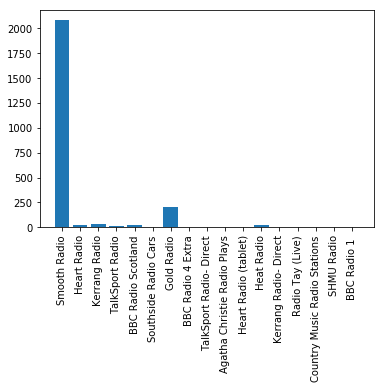

In [38]:
x = RadioDataCounter.keys()
y = RadioDataCounter.values()

locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.bar(x, y)

I wanted to look at what types of things the users were looking at on the internet.

In [39]:
InternetData = []
for i in df.index:
    if df.at[i, 'LinkType'] == 'Internet':
        InternetData.append(df.at[i, 'LinkTitle'])

print(InternetData)

['Sam Smith', 'Elton John', 'BBC Formula 1', 'YouTube', 'YouTube', 'YouTube', 'Elvis Presley', 'Red Hot Chili Peppers', 'Elvis Presley', 'YouTube', 'Cliff Richard Official Page', 'Cliff Richard Official Page', 'Cliff Richard Official Page', 'Cliff Richard Official Page', 'Candy Crush Soda', 'Cliff Richard Official Page', 'BBC News', 'YouTube', 'Cliff Richard Official Page', 'Interview With Penny', 'Candy Crush Soda', 'Netflix', 'BBC Scotland Weather Forecast', 'BBC Football', 'Red Hot Chili Peppers', 'YouTube', 'Candy Crush Soda', 'Scottish Football', 'BBC News', 'YouTube', 'BBC Scotland Weather Forecast', 'Robbie Wiliams', 'Adele', 'Bon Jovi', 'YouTube', 'Glasgow Live', 'Glasgow Live', 'Red Hot Chili Peppers', 'The Butterfly Inn', 'Red Hot Chili Peppers', 'BBC Football', 'YouTube', 'Google', 'Google', 'Cliff Richard', 'Candy Crush Soda', 'Google', 'Dundee and Angus College', 'YouTube', 'YouTube', 'YouTube', 'Glasgow Live', 'Romantic Comedies', 'The Sound of Music', 'NHS Inform', 'Roma

In [40]:
len(InternetData)

56513

In [41]:
InternetDataCounter=collections.Counter(InternetData)

print(InternetDataCounter.keys())
print(InternetDataCounter.values())

dict_keys(['Sam Smith', 'Elton John', 'BBC Formula 1', 'YouTube', 'Elvis Presley', 'Red Hot Chili Peppers', 'Cliff Richard Official Page', 'Candy Crush Soda', 'BBC News', 'Interview With Penny', 'Netflix', 'BBC Scotland Weather Forecast', 'BBC Football', 'Scottish Football', 'Robbie Wiliams', 'Adele', 'Bon Jovi', 'Glasgow Live', 'The Butterfly Inn', 'Google', 'Cliff Richard', 'Dundee and Angus College', 'Romantic Comedies', 'The Sound of Music', 'NHS Inform', 'Mini Golf', 'Disney Films Video Music Playlist', 'Mahjong', 'Celtic FC Youtube channel', 'Celtic FC', 'BBC Boxing', 'Vectary', 'Rangers Football Club', 'The Four Pennies', 'Solitaire', 'The Allisons', 'Status Quo', 'Roy Orbison', 'The Pet Shop Boys', 'Jon Bon Jovi', 'A-Ha', 'Dire Sraits', 'Billy Joel', 'Connie Francis', 'Sky Football', 'Johnny Cash', 'Strictly Come Dancing', 'ABBA', 'Falkirk Football', 'Heard It Through The Grapevine', 'Huawei T&Cs', 'Google T&Cs', 'West FM', 'Taggart Episodes', '03/02/2001', 'Shows', 'Facebook',

There were so many diffrent searches that it is hard to see what is looked at the most. Becuase of this I read through the list. Looking at the list there were some pharses that poped up a lot. I decided to do a more focused visulisation for these phrases.

<BarContainer object of 730 artists>

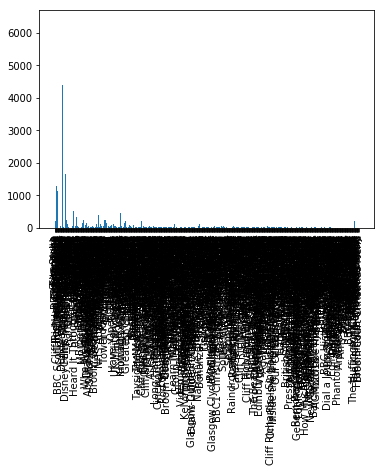

In [52]:
x = InternetDataCounter.keys()
y = InternetDataCounter.values()

locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.bar(x, y)

Lots of the users were using the internet to look at sports. Looking throught the data I can see that the phrase 'football' come up alot. I decided to make a visulisation to see which websites users are viewing related to football.

In [43]:
FootballData = []

for i in df.index:
    if df.at[i, 'LinkType'] == 'Internet':
        if type(df.at[i, 'LinkTitle']) is str:
            if df.at[i, 'LinkTitle'].count('Football') > 0:
                FootballData.append(df.at[i, 'LinkTitle'])

print(FootballData)

['BBC Football', 'Scottish Football', 'BBC Football', 'BBC Football', 'BBC Football', 'Rangers Football Club', 'BBC Football', 'BBC Football', 'BBC Football', 'BBC Football', 'Rangers Football Club', 'Sky Football', 'Sky Football', 'BBC Football', 'BBC Football', 'BBC Football', 'BBC Football', 'Falkirk Football', 'Rangers Football Club', 'Rangers Football Club', 'Rangers Football Club', 'Rangers Football Club', 'BBC Football', 'BBC Football', 'BBC Football', 'Sky Football', 'Sky Football', 'Sky Football', 'BBC Football', 'Rangers Football Club', 'BBC Football', 'BBC Football', 'BBC Football', 'Scottish Football', 'Scottish Football', 'BBC Football', 'BBC Football', 'Falkirk Football', 'BBC Football', 'BBC Football', 'BBC Football', 'BBC Football', 'Sky Football', 'Sky Football', 'Sky Football', 'BBC Football', 'BBC Football', 'BBC Football', 'BBC Football', 'Rangers Football Club', 'BBC Football', 'BBC Football', 'BBC Football', 'Rangers Football Club', 'Rangers Football Club', 'BBC F

In [44]:
len(FootballData)

5651

In [45]:
FootballDataCounter=collections.Counter(FootballData)

print(FootballDataCounter.keys())
print(FootballDataCounter.values())

dict_keys(['BBC Football', 'Scottish Football', 'Rangers Football Club', 'Sky Football', 'Falkirk Football', 'Football Games', 'Kilmarnock Football Club', 'Dundee United Football Club', 'Blackpool Football Club', 'Football Games '])
dict_values([2686, 404, 1367, 1057, 47, 54, 6, 3, 9, 18])


The chart shows that people are looking at football news on the Sky  and BBC websites. It also gives insight into which teams the users support. You can also tell that users are from Scotland or the north by the teams that are being searched for 'Scottish Football', 'Rangers Football Club', 'Falkirk Football', 'Kilmarnock Football Club', 'Dundee United Football Club' and 'Blackpool Football Club'. This shows that although the data does not have the specific geographical location of the users, you could still find out this information in other ways. This is an important thing to be aware of in the future with data protection.

<BarContainer object of 10 artists>

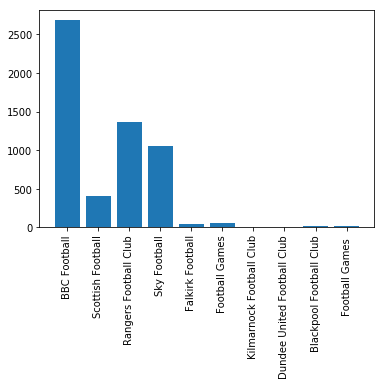

In [53]:
x = FootballDataCounter.keys()
y = FootballDataCounter.values()

locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.bar(x, y)

In [ ]:
sns.lmplot(x="Time", y="tip", data=df)

Now I am going to explore the second dataset of user data called ud.

In [46]:
print(ud)

     ExternalID  CleverCogsUserId  BirthDate Gender              Condition  \
0          4703               685 1965-07-04      F           Spina Bifida   
1          4704               772 1940-06-21      F                   COPD   
2          4706              1128 1931-02-25      F               Dementia   
3          4707              1159 1982-09-18      F           Brain Injury   
4          4708               784 1931-12-20      F                    NaN   
5          4709               938 1925-11-28      F   Elderly Care/Support   
6          4710               807 1937-01-21      F               Dementia   
7          4711               765 1955-06-25      F         Cerebral Palsy   
8          4712               811 1929-05-10      F               Dementia   
9          4713               683 1960-05-28      F               Epilepsy   
10         4714               860 1949-05-28      F                    NaN   
11         4714               860 1949-05-28      F   Elderly Ca

I want to discover a bit more about the user demographics of the tablet. I started by visualising the gender of users. This allowed me to see that there are more female users than male.

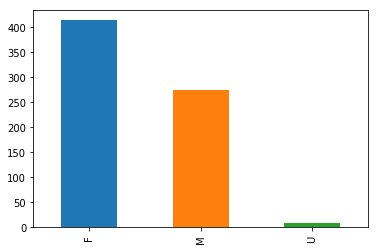

In [47]:
ud['Gender'].value_counts().plot(kind='bar')

I created a bar chart to show me clearly what conditions are the most prodominent.

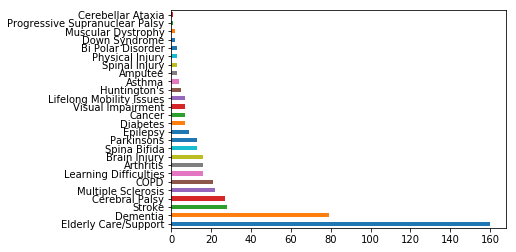

In [48]:
ud['Condition'].value_counts().plot(kind='barh')

I worked out the mean age of users.

In [49]:
ud['Age'].mean()

73.76945244956772

I worked out the mode ages of users.

In [50]:
ud['Age'].mode()

0    87.0
dtype: float64

I worked out the meadian age of users.

In [51]:
ud['Age'].median()

79.0

# Connecting Databases

In [57]:
pd.merge(df, ud, left_on='ExternalID', right_on='ExternalID', how='left').drop('ExternalID', axis=1)

ValueError: You are trying to merge on object and int64 columns. If you wish to proceed you should use pd.concat